<a href="https://colab.research.google.com/github/pywithpranavi/VDAY/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


/tmp/ipython-input-1825608448.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-1825608448.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


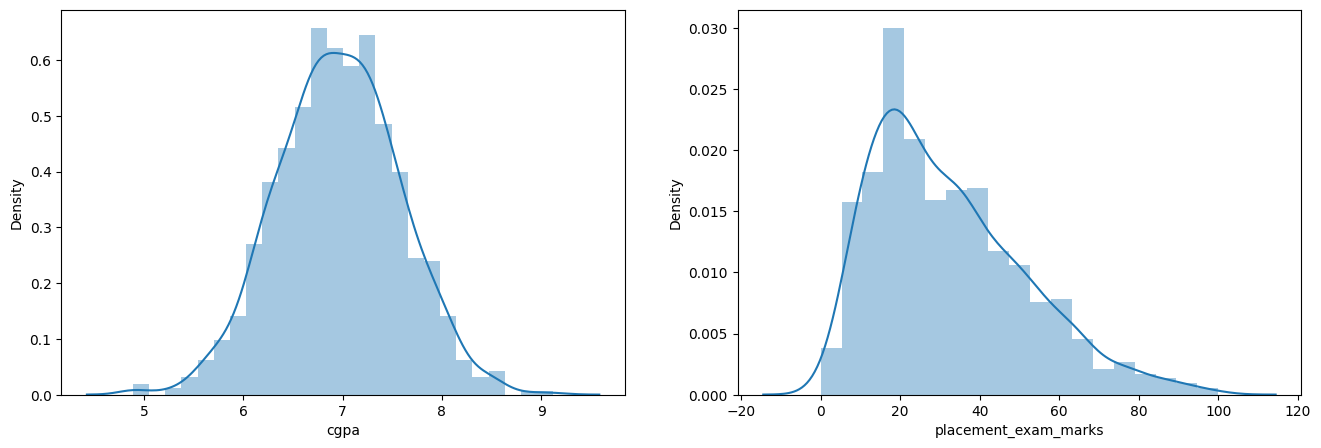

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()


In [6]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961240
std,0.615898
min,4.890000
25%,6.550000
50%,6.960000
75%,7.370000
max,9.120000


In [7]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
upper_limit

np.float64(8.808933625397168)

In [8]:
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()
lower_limit

np.float64(5.113546374602832)

In [9]:
#finding the outliers
df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


TRIMMING

In [10]:

new_df=df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]
new_df

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [12]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df['cgpa_zscore']


,cgpa_zscore
0,0.371425
1,0.809810
2,0.939701
3,-0.878782
4,0.436371
...,...
995,3.099150
996,3.505062
997,-3.362960
998,2.693239


In [13]:
df['cgpa_zscore'].describe()

,cgpa_zscore
count,1.000000e+03
mean,-1.474376e-16
std,1.000000e+00
min,-3.362960e+00
25%,-6.677081e-01
50%,-2.013321e-03
75%,6.636815e-01
max,3.505062e+00


In [14]:
new_df=df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


CAPPING

In [15]:
lower_limit

np.float64(5.113546374602832)

In [16]:
upper_limit

np.float64(8.808933625397168)

In [19]:
import numpy as np
df['cgpa']=np.where(
df['cgpa']>upper_limit,
upper_limit,
np.where(
    df['cgpa']<lower_limit,
    lower_limit,
    df['cgpa']
  )
)

In [20]:
df.shape

(1000, 4)

In [24]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


when we change distribution of the placement exam marks column its distribution is positively screwed its distribution is positive spread
(2)if distribution is +ve or -ve spread then we use IQR method to remove the outlier.

In [ ]:
#when we change distribution of the placement exam marks column its distribution is positively screwed its distribution is positive spread
#if distribution is +ve or -ve spread then we use IQR method to remove the outlier

In [26]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: xlabel='placement_exam_marks'>

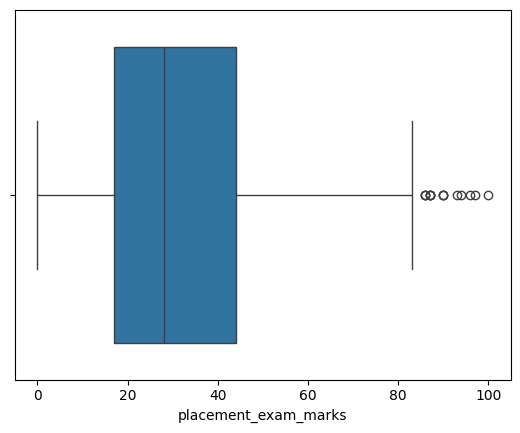

In [27]:
sns.boxplot(df['placement_exam_marks'],orient='h')

finding the iqr

In [41]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)



In [42]:
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)
print("value of percentile25",percentile25)


value of percentile25 17.0


In [45]:
iqr = Q3 - Q1
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr

In [46]:
print(" upper limit",upper_limit)
print( "lower limit",lower_limit)

 upper limit 84.5
lower limit -23.5


In [47]:
new_df=df[(df['placement_exam_marks']<upper_limit)]

In [48]:
new_df.shape

(985, 3)

/tmp/ipython-input-3573010346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
/tmp/ipython-input-3573010346.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


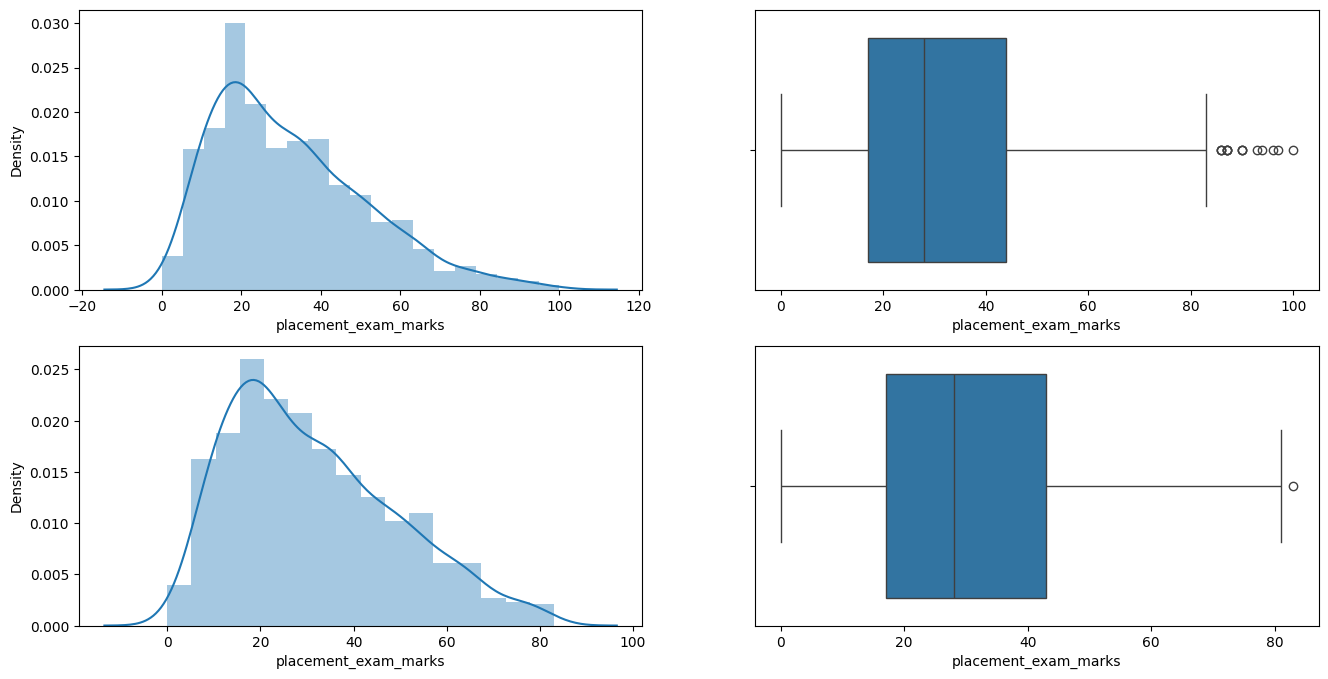

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')
plt.show()

In [53]:
df.isnull().sum()

,0
cgpa,0
placement_exam_marks,0
placed,0
